### **Reinforcement Learning**

---

#### Q-Learning

In [20]:
# General imports
import gym
import numpy as np
from time import sleep
from IPython.display import clear_output

'0.17.3'

In [ ]:
env = gym.make('Taxi-v3').env
env.reset()
env.render()

In [ ]:
# 0  = south, 1 = north, 2 = east, 3 = west, 4  = pickup, 5 = dropoff
env.action_space

Temporal difference (Q-learning)

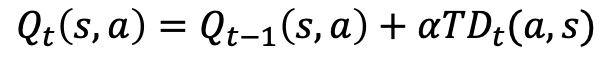

In [8]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

In [ ]:
%%time

alpha = 0.1
gamma = 0.6
epsilon = 0.1

for i in range(10000): # episodes / game
  # get actual position
  state = env.reset()

  penalties, reward = 0, 0
  done = False
  while not done:
    # Exploration
    if random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    # Exploitation
    else:
      # get the best position to move
      action = np.argmax(q_table[state])
    
    next_state, reward, done, info = env.step(action)
    
    q_old = q_table[state, action]
    next_max = np.max(q_table[next_state])
    
    q_new = (1 - alpha) * q_old + alpha * (reward + gamma * next_max)
    q_table[state, action] = q_new

    if reward == -10:
      penalties += 1

    state = next_state

  if i % 100 == 0:
    clear_output(wait=True)
    print('Episode: ', i)
print('The training has finished!')

In [ ]:
env.render()

In [ ]:
# Evaluation
total_penalties = 0
episodes = 50
frames = []

for _ in range(episodes):
  state = env.reset()
  penalties, reward = 0, 0
  done = False
  while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
      penalties += 1

    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
    })

  total_penalties += penalties

print('Episodes: ', episodes)
print('Penalties: ', total_penalties)

In [ ]:
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('State', frame['state'])
  print('Action', frame['action'])
  print('Reward', frame['reward'])
  sleep(.5)